In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [8]:
df['number'].nunique()

7

Text(0.5, 1.0, 'Passengers travelling with')

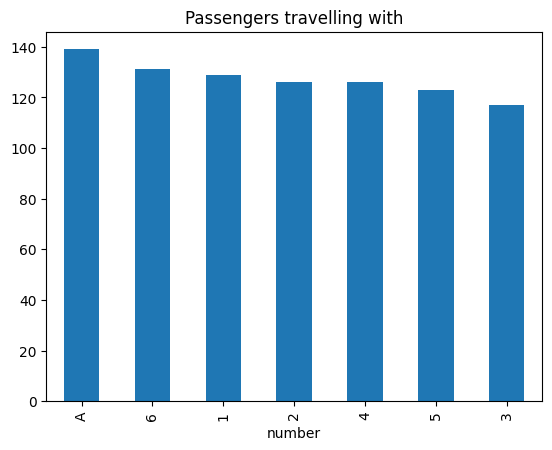

In [12]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [13]:
# extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [14]:
df['number_numerical']

0      5.0
1      3.0
2      6.0
3      3.0
4      NaN
      ... 
886    3.0
887    3.0
888    1.0
889    2.0
890    3.0
Name: number_numerical, Length: 891, dtype: float64

In [15]:
# extract categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [16]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [20]:
df['cabin_num'] = df['Cabin'].str.extract(r'(\d+)')
df['cabin_alpha'] = df['Cabin'].str[0]

<Axes: xlabel='cabin_alpha'>

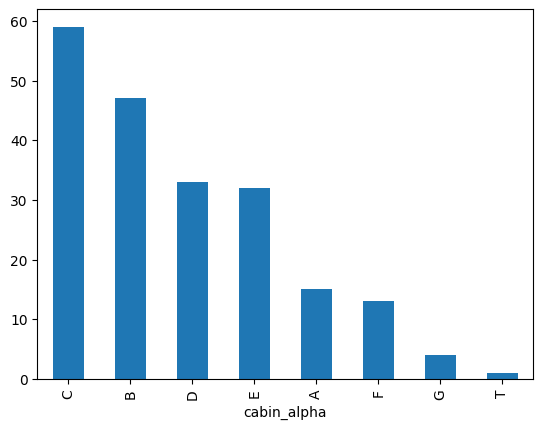

In [21]:
df['cabin_alpha'].value_counts().plot(kind='bar')

In [37]:
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

In [38]:
df['ticket_cat']

0           A/5
1            PC
2      STON/O2.
3           NaN
4           NaN
         ...   
886         NaN
887         NaN
888       W./C.
889         NaN
890         NaN
Name: ticket_cat, Length: 891, dtype: object

In [39]:
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

In [40]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_alpha,ticket_cat,ticket_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,A/5,21171.0
1,C85,PC 17599,3,1,3.0,NaN,85,C,PC,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,STON/O2.,3101282.0
3,C123,113803,3,1,3.0,NaN,123,C,NaN,113803.0
4,NaN,373450,A,0,NaN,A,NaN,NaN,NaN,373450.0
